# EDA/Pre-processing
Initial EDA. 
Takes in the initial text data and returns various pre-processed data sets to the data folder.

## STEP 1: Exploratory Data Analysis

In [4]:
%pylab inline
import pandas as pd
import os

# data visualization
import matplotlib.pyplot as plt

# NLP
import nltk

# Seaborn
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Change current working directory to the data folder
os.getcwd()
os.chdir("../data")

# Read file into pandas
# 3 files are yelp_labelled.txt, amazon_cells_labelled.txt, imdb_labelled.txt
txt_file = 'yelp_labelled.txt';
df = pd.read_table(txt_file, sep='\t')
df.columns = ['reviews','sentiment']
df['len'] = [len(x) for x in df['reviews']]

## STEP 2: Basic Statistics

mean = 55.9519038076
std = 30.1987022008


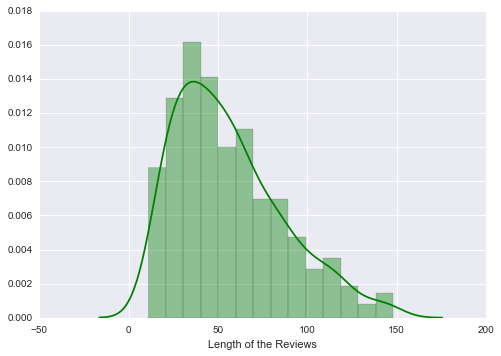

In [8]:
pos = df[(df['sentiment'] == 1)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print 'mean =',mean(pos['len'])
print 'std =', std(pos['len'])

mean = 60.752
std = 34.1921993443


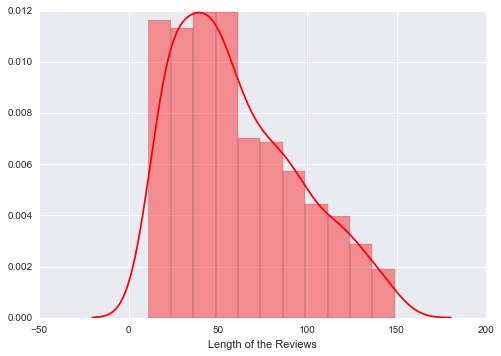

In [11]:
neg = df[(df['sentiment'] == 0)]
plot = sns.distplot(neg['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews', color="r")
fig = plot.get_figure()
fig.savefig("neg_distribution.png")
print 'mean =', mean(neg['len'])
print 'std =', std(neg['len'])

In [14]:
z = (60.752-55.9519038076)/math.sqrt((34.1921993443**2)/500+(30.1987022008**2)/500)
z

2.3528367532465597

### Basic Statistics

In [3]:
df.describe(include="all")

,reviews,sentiment
count,999,999.000000
unique,995,NaN
top,The food was terrible.,NaN
freq,2,NaN
mean,NaN,0.499499
std,NaN,0.500250
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


### More Complex Visualizations

In [4]:
# Mapping length of sentences
def len_vis(data_col):
    t_col = data_col.apply(lambda x: len(x))
    fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
    #Create one or more subplots using add_subplot, because you can't create blank figure
    ax = fig.add_subplot(1,1,1)
    #Variable
    ax.hist(t_col,bins = 50) # Here you can play with number of bins

    plt.title('Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

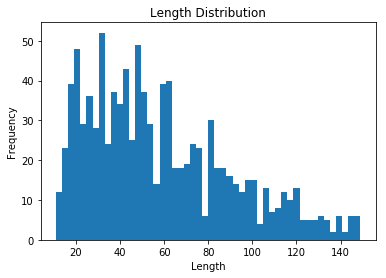

In [5]:
len_vis(df['reviews'])

## STEP 3: Clean data

### Count_unique method
Allows us to count the number of unique words which will be the number of words in our bag-of-words model. A simple statistic for basic insight on the impact of our data cleaning.

In [6]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

### Tokenize

In [7]:
#Remove problems with encoding
df['reviews'] = df['reviews'].apply(lambda x: unicode(x, errors="ignore"))

In [8]:
#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# make reviews lowercase
df['reviews'] = df['reviews'].apply(lambda x: x.lower())
# tokenize
df['reviews'] = df['reviews'].apply(lambda x: tokenizer.tokenize(x))
# visual check
df.head()

,reviews,sentiment
0,"[crust, is, not, good]",0
1,"[not, tasty, and, the, texture, was, just, nasty]",0
2,"[stopped, by, during, the, late, may, bank, ho...",1
3,"[the, selection, on, the, menu, was, great, an...",1
4,"[now, i, am, getting, angry, and, i, want, my,...",0


In [9]:
# Check feature count
count_unique(df['reviews'])

2049

### POS Tagging/Removal

In [10]:
# POS tag
df['posr']= df['reviews'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df['nposr'] = df['reviews']

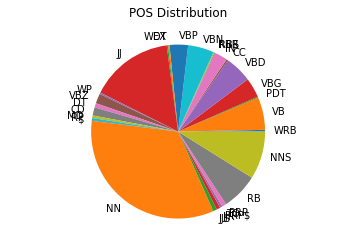

In [11]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()    

In [12]:
df.head()

,reviews,sentiment,posr,nposr
0,"[crust, is, not, good]",0,"[(crust, NN), (is, VBZ), (not, RB), (good, JJ)]","[crust, is, not, good]"
1,"[not, tasty, and, the, texture, was, just, nasty]",0,"[(not, RB), (tasty, JJ), (and, CC), (the, DT),...","[not, tasty, and, the, texture, was, just, nasty]"
2,"[stopped, by, during, the, late, may, bank, ho...",1,"[(stopped, VBN), (by, IN), (during, IN), (the,...","[stopped, by, during, the, late, may, bank, ho..."
3,"[the, selection, on, the, menu, was, great, an...",1,"[(the, DT), (selection, NN), (on, IN), (the, D...","[the, selection, on, the, menu, was, great, an..."
4,"[now, i, am, getting, angry, and, i, want, my,...",0,"[(now, RB), (i, VBZ), (am, VBP), (getting, VBG...","[now, i, am, getting, angry, and, i, want, my,..."


In [13]:
# Collection of adjectives, nouns, adverbs and verbs to keep
pos_keep = ["JJ","JJR","JJS","NN","NNP","NNS","RB","RBR","VB","VBD","VBG","VBN","VBZ"]


def remove_pos(full):
    redc =[]
    for pair in full:
        if pair[1] in pos_keep:
            redc.append(pair[0])
    return redc
# Remove the words that are not in pos_keep
df['posr']= df['posr'].apply(lambda x: remove_pos(x))

df.head()

,reviews,sentiment,posr,nposr
0,"[crust, is, not, good]",0,"[crust, is, not, good]","[crust, is, not, good]"
1,"[not, tasty, and, the, texture, was, just, nasty]",0,"[not, tasty, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]"
2,"[stopped, by, during, the, late, may, bank, ho...",1,"[stopped, late, bank, holiday, rick, steve, re...","[stopped, by, during, the, late, may, bank, ho..."
3,"[the, selection, on, the, menu, was, great, an...",1,"[selection, menu, was, great, so, were, prices]","[the, selection, on, the, menu, was, great, an..."
4,"[now, i, am, getting, angry, and, i, want, my,...",0,"[now, i, getting, angry, i, damn, pho]","[now, i, am, getting, angry, and, i, want, my,..."


In [14]:
print(count_unique(df['posr']))

1894


### Remove Stopwords

In [15]:
# Import the list of stopwords from NLTK
from nltk.corpus import stopwords

# Remove the stopwords and store in "No Stops" column
stop = set(stopwords.words('english'))
# Ensure "not" is kept
stop.remove("not")
df['posr_stpd'] = df['posr'].apply(lambda x: [item for item in x if item not in stop])
df['nposr_stpd'] = df['nposr'].apply(lambda x: [item for item in x if item not in stop])
df['posr_nstpd'] = df['posr']
df['nposr_nstpd'] = df['nposr']
# visual check
df.head()

,reviews,sentiment,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd
0,"[crust, is, not, good]",0,"[crust, is, not, good]","[crust, is, not, good]","[crust, not, good]","[crust, not, good]","[crust, is, not, good]","[crust, is, not, good]"
1,"[not, tasty, and, the, texture, was, just, nasty]",0,"[not, tasty, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]"
2,"[stopped, by, during, the, late, may, bank, ho...",1,"[stopped, late, bank, holiday, rick, steve, re...","[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, by, during, the, late, may, bank, ho..."
3,"[the, selection, on, the, menu, was, great, an...",1,"[selection, menu, was, great, so, were, prices]","[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]","[selection, menu, great, prices]","[selection, menu, was, great, so, were, prices]","[the, selection, on, the, menu, was, great, an..."
4,"[now, i, am, getting, angry, and, i, want, my,...",0,"[now, i, getting, angry, i, damn, pho]","[now, i, am, getting, angry, and, i, want, my,...","[getting, angry, damn, pho]","[getting, angry, want, damn, pho]","[now, i, getting, angry, i, damn, pho]","[now, i, am, getting, angry, and, i, want, my,..."


In [16]:
# check feature count
count_unique(df['posr_stpd'])

1834

### Stemming.
We will test three different stemmers. Porter, Snowball, Lancaster

In [17]:
ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer('english')
ls = nltk.LancasterStemmer()

# No Stemming
df['nposr_nstpd_nstem'] = df['nposr_nstpd']
df['posr_nstpd_nstem'] = df['posr_nstpd']
df['nposr_stpd_nstem'] = df['nposr_stpd']
df['posr_stpd_nstem'] = df['posr_stpd']
# Porter
df['nposr_nstpd_port'] = df['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_nstpd_port'] = df['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['nposr_stpd_port'] = df['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_stpd_port'] = df['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
# Snowball
df['nposr_nstpd_snow'] = df['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_nstpd_snow'] = df['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['nposr_stpd_snow'] = df['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_stpd_snow'] = df['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
# Lancaster
df['nposr_nstpd_lanc'] = df['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_nstpd_lanc'] = df['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['nposr_stpd_lanc'] = df['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_stpd_lanc'] = df['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

df.head()

,reviews,sentiment,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd,nposr_nstpd_nstem,posr_nstpd_nstem,...,nposr_stpd_port,posr_stpd_port,nposr_nstpd_snow,posr_nstpd_snow,nposr_stpd_snow,posr_stpd_snow,nposr_nstpd_lanc,posr_nstpd_lanc,nposr_stpd_lanc,posr_stpd_lanc
0,"[crust, is, not, good]",0,"[crust, is, not, good]","[crust, is, not, good]","[crust, not, good]","[crust, not, good]","[crust, is, not, good]","[crust, is, not, good]","[crust, is, not, good]","[crust, is, not, good]",...,"[crust, not, good]","[crust, not, good]","[crust, is, not, good]","[crust, is, not, good]","[crust, not, good]","[crust, not, good]","[crust, is, not, good]","[crust, is, not, good]","[crust, not, good]","[crust, not, good]"
1,"[not, tasty, and, the, texture, was, just, nasty]",0,"[not, tasty, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, was, just, nasty]",...,"[not, tasti, textur, nasti]","[not, tasti, textur, nasti]","[not, tasti, and, the, textur, was, just, nasti]","[not, tasti, textur, was, just, nasti]","[not, tasti, textur, nasti]","[not, tasti, textur, nasti]","[not, tasty, and, the, text, was, just, nasty]","[not, tasty, text, was, just, nasty]","[not, tasty, text, nasty]","[not, tasty, text, nasty]"
2,"[stopped, by, during, the, late, may, bank, ho...",1,"[stopped, late, bank, holiday, rick, steve, re...","[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, bank, holiday, rick, steve, re...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, late, bank, holiday, rick, steve, re...",...,"[stop, late, may, bank, holiday, rick, steve, ...","[stop, late, bank, holiday, rick, steve, recom...","[stop, by, dure, the, late, may, bank, holiday...","[stop, late, bank, holiday, rick, steve, recom...","[stop, late, may, bank, holiday, rick, steve, ...","[stop, late, bank, holiday, rick, steve, recom...","[stop, by, dur, the, lat, may, bank, holiday, ...","[stop, lat, bank, holiday, rick, stev, recomme...","[stop, lat, may, bank, holiday, rick, stev, re...","[stop, lat, bank, holiday, rick, stev, recomme..."
3,"[the, selection, on, the, menu, was, great, an...",1,"[selection, menu, was, great, so, were, prices]","[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]","[selection, menu, great, prices]","[selection, menu, was, great, so, were, prices]","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[selection, menu, was, great, so, were, prices]",...,"[select, menu, great, price]","[select, menu, great, price]","[the, select, on, the, menu, was, great, and, ...","[select, menu, was, great, so, were, price]","[select, menu, great, price]","[select, menu, great, price]","[the, select, on, the, menu, was, gre, and, so...","[select, menu, was, gre, so, wer, pric]","[select, menu, gre, pric]","[select, menu, gre, pric]"
4,"[now, i, am, getting, angry, and, i, want, my,...",0,"[now, i, getting, angry, i, damn, pho]","[now, i, am, getting, angry, and, i, want, my,...","[getting, angry, damn, pho]","[getting, angry, want, damn, pho]","[now, i, getting, angry, i, damn, pho]","[now, i, am, getting, angry, and, i, want, my,...","[now, i, am, getting, angry, and, i, want, my,...","[now, i, getting, angry, i, damn, pho]",...,"[get, angri, want, damn, pho]","[get, angri, damn, pho]","[now, i, am, get, angri, and, i, want, my, dam...","[now, i, get, angri, i, damn, pho]","[get, angri, want, damn, pho]","[get, angri, damn, pho]","[now, i, am, get, angry, and, i, want, my, dam...","[now, i, get, angry, i, damn, pho]","[get, angry, 

### Output to a file

In [18]:
# put final to csv just in case need a file
df.to_csv('final.csv')

## Step 4 : Test and Evaluate with Logistic Regression, Naive Bayes, k-fold

### Import Essential Libraries

In [19]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Import sklearn and NLTK Library and Modules

In [20]:
from nltk.classify import NaiveBayesClassifier
>>> from nltk.corpus import subjectivity
>>> from nltk.sentiment import SentimentAnalyzer
>>> from nltk.sentiment.util import *

from sklearn.linear_model import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
logreg = SklearnClassifier(LogisticRegression())

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Function to Convert the Data into a Feature Set

In [21]:
## Transform data into list of ([tokens],sentiment label)
def createTrainingDataNLTK(sentences,labels):
    rdata = np.vstack([sentences,labels])
    rdata = np.transpose(rdata)
    data = list();
    for i in range(0,len(rdata)):
        tokens = rdata[i][0].split(" ")
        d_tuple = (tokens, rdata[i][1]);
        data.append(d_tuple)
    return data;

## Create the Training Data

In [22]:
# create a list of all possible feature reduction permutations in the order of stopword removal_pos_stem
featurereductions = ['nposr_nstpd_nstem', 'posr_nstpd_nstem', 
                     'nposr_stpd_nstem', 'posr_stpd_nstem', 
                     'nposr_nstpd_port', 'nposr_nstpd_snow', 'nposr_nstpd_lanc', 'nposr_stpd_port', 'nposr_stpd_snow', 'nposr_stpd_lanc',
                     'posr_nstpd_port', 'posr_nstpd_snow', 'posr_nstpd_lanc', 'posr_stpd_port', 'posr_stpd_snow', 'posr_stpd_lanc']

In [23]:
# merge the words into sentence to use current implementation of createTrainingData
def create_nltk_train_data (feature_reduction):
    df['sentences'] = df[feature_reduction].apply(lambda x: " ".join(x).encode('UTF-8'))
    x_label = "sentences"
    y_label = "sentiment"
    nltk_train_data = createTrainingDataNLTK(df[x_label],df[y_label])
    return nltk_train_data

## Functions to Train the Classifers and Run it Against Test Data

In [24]:
# returns the accuracy of the test data for Naive Bayes
# when predicted against fitted training data
def train1(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = NaiveBayesClassifier.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

In [25]:
# returns the accuracy of the test data for Logistic Regression
# when predicted against fitted training data
def train2(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = logreg.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

## K-Fold Cross Validation

In [26]:
## A custom parser function to interpret results of training function
def nltk_parser(results,summer):
    for key,value in sorted(results):
        #print('{0}: {1}'.format(key, value))
        if key == "Accuracy": summer += value;
    print
    return summer

In [27]:
## k-fold cross validation designed to be agnostic to training data and training function
def k_fold_validation(k,data,train_func,parser):
    
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    print k, "- fold cross validation"
    print "-----------------------------"
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[s_i:f_i]
        train_data = data[0:s_i]+data[f_i:len(data)];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);

    print '\nAverage Accuracy:', sum_acc / k;

## K-Fold average accuracy

In [28]:
## k-fold cross validation designed to be agnostic to training data and training function
# Returns average accuracy
def k_fold_validation_simple(k,data,train_func,parser):
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[s_i:f_i]
        train_data = data[0:s_i]+data[f_i:len(data)];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);
    return sum_acc / k;

## Test Accuracy Using K-Fold Cross Validation

# Naive Bayes

In [29]:
K = 5; # Constant for K-fold cross validation
accuracies =[]
dict_metrics_nb = {}
for i in range(0, len(featurereductions)):
    nltk_train_data = create_nltk_train_data (featurereductions[i])
    print featurereductions[i]
    accuracies.append(k_fold_validation_simple(K,nltk_train_data,train1,nltk_parser))
    # creates a dict with featurereduction techniques, accuracy, and feature counts
    dict_metrics_nb.update({featurereductions[i]: accuracies[i]})
    print accuracies[i]

nposr_nstpd_nstem
Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

0.749748743719
posr_nstpd_nstem
Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

0.734673366834
nposr_stpd_nstem
Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Evaluating NaiveBayesClassifier results...

Training classifier
Ev

# Logistic Regression

In [31]:
K = 5; # Constant for K-fold cross validation
accuracies2 = []
dict_metrics_lr = {}
for i in range(0, len(featurereductions)):
    nltk_train_data = create_nltk_train_data (featurereductions[i])
    print featurereductions[i]
    accuracies2.append(k_fold_validation_simple(K,nltk_train_data,train2,nltk_parser))
    # creates a dict with featurereduction techniques, accuracy, and feature counts
    dict_metrics_lr.update({featurereductions[i]: accuracies2[i]})
    print accuracies2[i]

nposr_nstpd_nstem
Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

0.761809045226
posr_nstpd_nstem
Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

0.746733668342
nposr_stpd_nstem
Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

Training classifier
Evaluating SklearnClassifier results...

0.7

## Final Visualization

In [32]:
# Store accuracy from K-fold testing step
nb_df = pd.DataFrame.from_dict(dict_metrics_nb, orient='index')
lr_df = pd.DataFrame.from_dict(dict_metrics_lr, orient='index')

In [33]:
# Add column for the number of unique features/words
nb_df['indices'] = nb_df.index.values 
lr_df['indices'] = lr_df.index.values
nb_df['feature'] = nb_df['indices'].apply(lambda x: count_unique(df[x]))
lr_df['feature'] = lr_df['indices'].apply(lambda x: count_unique(df[x]))

In [34]:
# Rename the columns
nb_df.columns = ['acc', 'indices', 'features']
lr_df.columns = ['acc', 'indices', 'features']

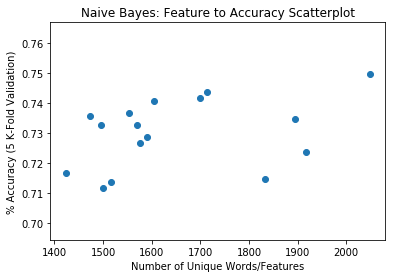

In [35]:
# Create Naive Bayes Visualization
final_nb = plt.subplot()
x = nb_df['features']
y = nb_df['acc']

final_nb.set_xlabel("Number of Unique Words/Features")
final_nb.set_ylabel("% Accuracy (5 K-Fold Validation)")
final_nb.set_title("Naive Bayes: Feature to Accuracy Scatterplot")

final_nb.scatter(x,y)

Interpretation of above graph: The highest accuracy data set was created doing nothing to it. The highest and uppermost data point represents the dataset nposr_nstpd_nstem which for this case has the highest accuracy of 75.0%

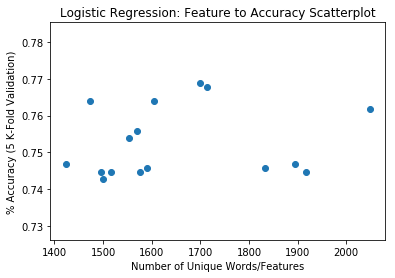

In [36]:
# Create Logistic Regression Visualization
final_lr = plt.subplot()
x = lr_df['features']
y = lr_df['acc']

final_lr.set_xlabel("Number of Unique Words/Features")
final_lr.set_ylabel("% Accuracy (5 K-Fold Validation)")
final_lr.set_title("Logistic Regression: Feature to Accuracy Scatterplot")

final_lr.scatter(x,y)

Interpretation of above graph: The highest accuracy data set was created by just stemming with the snowball stemmer. The highest data point occurs at about 1700 Unique Words and is represented by nposr_nstpd_snow which for this case has the highest accuracy of 76.9%

## Conclusion
Overall we have seen that logistic regression generally performs better than naive bayes on our yelp data set. In terms of feature reduction, it only improved accuracy for logistic regression and was highest using only stemmers, snowball being the most effective overall with 76.9% accuracy.